In [96]:
# Sinan Yumurtaci
# Psychology RA w/ Professor Derek Huffman

# Python script to generate trial configuration for our VR experiment built with Landmarks

In [97]:
from random import random
import math
import matplotlib.pyplot as plt
import time

## New Experimental Approach
generating trials
    -> each trial consists of multiple targets
    -> participant moves from target to target, revealing the next one each time
    -> after the last target, we ask them to point to a specific object 
    ? what is the order of the objects
    ? what objects do we display? apples and pencils? red-green-blue balls?
    ? how many objects?
    ? what is the distance between? what kind of experimental controls?
    ? how many objects ask about? data analysis: do we control for the ranking of the asking
    ? the distance between the pointing-from location and the ground-truth will not be discrete and equal. is it ok if the ground-truth distance is continious rather than discere? how do we account for that in our analysis
    ? how many trials?
    ? do we keep the border on during the entire trial, or specify for each object
    ? how do we account for border-crossings? how many times do we make the participant move across the border?
    ? how do we account for the different time and distance elapsed for between participants? how do we account for time taken in pointing?
    ? do we see recency and primacy effects in the order of objects?
    ? what do we balance? what do we not balance?
        ? do we ask about specific sample of objects that are consistent across the trials while using the rest of the objects as distractions?
      
    A1: ground-truth distance is continuous. We will be looking at regression of the error across that.
    -> This gives us flexibility to very specifically configure the distances between objects
      
      
## Tasks for next Thursday
[ ] prototype a python script that would be able to model with the new experimental approach
[ ] code in parameters for variables mentioned above (list of objects, number of objects, crossing specific trials?, distances between objects?)
[ ] look into the unity implementation and think about how we can integrate these changes there
    [ ] if possible, start revamping the experiment to follow this approach with some dummy testing trials
    

In [105]:
config = {
    "items": [
        { # medium distance, within boundary
            "distance": 4,
            "crossBoundary": "False",
            "count": {
                "borderless": 1,
                "withBorder": 1,
            }
        },
        { # short distance, across boundary
            "distance": 1, # meters
            "crossBoundary": "True",
            "count": {
                "borderless": 1,
                "withBorder": 1,
            }
        },
        { # medium distance, across boundary
            "distance": 2,
            "crossBoundary": "True",
            "count": {
                "borderless": 1,
                "withBorder": 1,
            }
        },
        { # long distance, across boundary
            "distance": 4,
            "crossBoundary": "True",
            "count": {
                "borderless": 1,
                "withBorder": 1,
            }
        },
        
        { # short distance, within boundary
            "distance": 1,
            "crossBoundary": "False",
            "count": {
                "borderless": 1,
                "withBorder": 1,
            }
        }
    ]
}

2.239937775848566 1.5187123205982909 0.5836688382757775 5.159697517826029 False


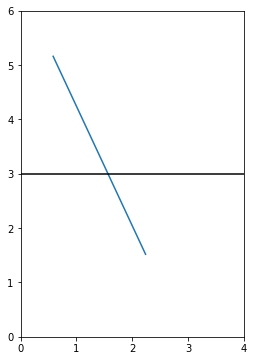

3.610048295764936 0.5090668670258609 0.5543528599344474 3.0902924293207796 False


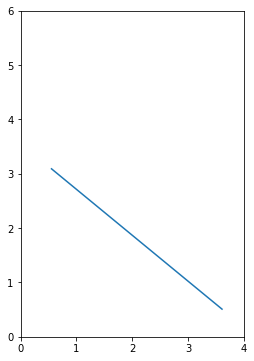

1.197123242317887 3.6210221541747143 1.3910009628392224 2.639996451409771 True


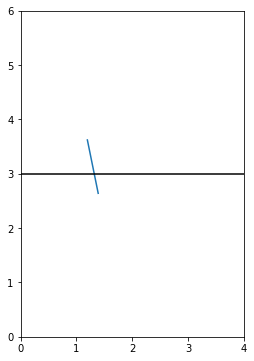

2.505229945507064 3.7681786796301404 1.9616227523703587 2.928838927461787 True


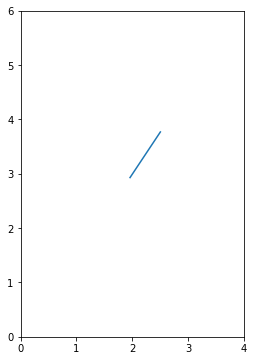

1.0842564235680494 3.9412234032939075 1.2789693454949105 1.9507242503087312 True


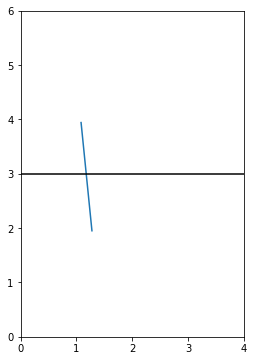

0.8653313842193278 4.206564033690566 0.6906322252652461 2.214208592545403 True


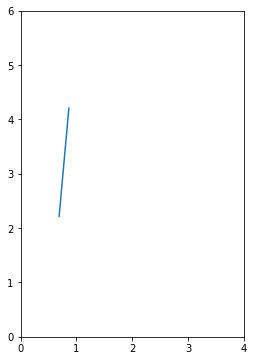

3.276588635657146 5.283431205983087 1.7156274468608783 1.600579027701729 True


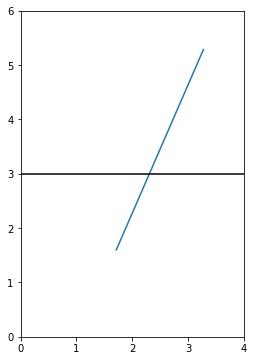

1.9389679915769524 5.148832989973764 1.0796331637542096 1.2422304182126105 True


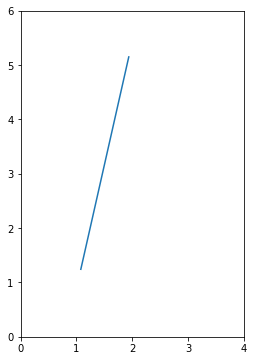

3.1527551996208683 1.8914344026920586 2.208018958856224 1.563602989636677 False


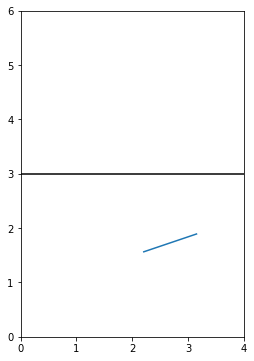

1.5974555051615393 1.3247545533385285 1.397828506274264 2.304626515033147 False


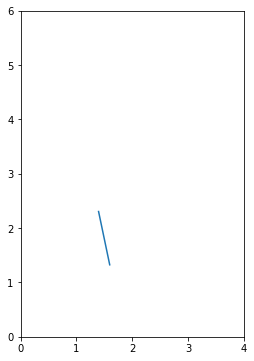

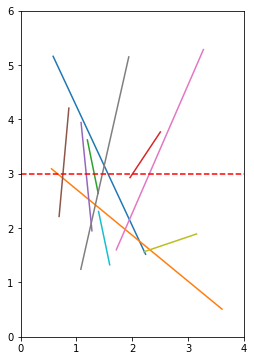

In [106]:
width = 4
length = 6 # boundary is half-way within length

trials = []

PLOT_INDIVIDUAL = True
PLOT_ALL = True

def gen_rand(distance):
    start_x = random() * width
    start_y = random() * length
    
    theta = random() * 360
    end_x = start_x + math.cos(theta) * distance
    end_y = start_y + math.sin(theta) * distance
    
    return (start_x, start_y, end_x, end_y)

def check_points(cross, start_x, start_y, end_x, end_y, hasBorder):

    buffer = 0.05
    x_lo = buffer * width
    x_hi = (1 - buffer) * width
    
    y_lo = buffer * length
    y_hi = (1 - buffer) * length
    
    border_lo = (length / 2) - length * buffer
    border_hi = (length / 2) + length * buffer
    
    isOnOppSide = (start_y - (length / 2) )>= 0 == (end_y - (length / 2) >= 0)
    
    
    # TODO: FIX CROSS CHECK
    crossIsCorrect = (isOnOppSide == cross)
    bufferFromBoundary = (x_lo < start_x < x_hi) and (x_lo < end_x < x_hi) and (y_lo < start_y < y_hi) and (y_lo < end_y < y_hi)
    bufferFromBorder = not hasBorder or not (border_lo < start_y < border_hi or border_lo < end_y < border_hi)
    
    return crossIsCorrect and bufferFromBoundary and bufferFromBorder

def gen_valid(distance, cross, hasBorder):
    tries = 0
    max_tries = 1000
    while tries < max_tries:
        x,y,v,w = gen_rand(distance)
        tries += 1
        if check_points(cross, x,y,v,w, hasBorder):
            print(x,y,v,w, cross)
            return [x,y,v,w]
    print(distance, cross, " failed after ", tries , " tries")
    

for item in config["items"]:
    for i in range(item["count"]["borderless"] + item["count"]["withBorder"]):
        hasBorder = i < item["count"]["borderless"]
        x,y,v,w = gen_valid(item["distance"], item["crossBoundary"] == "True", hasBorder)
        
        trials.append([x,y,v,w,hasBorder])
        
        if PLOT_INDIVIDUAL:
            fig, ax = plt.subplots(figsize=(width, length))
            
            plt.plot([x,v], [y,w])
            if hasBorder:
                plt.plot([0, width],[length/2, length/2], "k-")
            
            plt.xlim(0, width)
            plt.ylim(0, length)
            plt.show()
            

if PLOT_ALL:
    # plot all together
    
    fig, ax = plt.subplots(figsize=(width, length))
    plt.xlim([0, width])
    plt.ylim([0, length])
    for trial in trials:
        x,y,v,w = tuple(trial[:4])
        ax.plot([x,v], [y,w])
    plt.plot([0, width],[length/2, length/2], "--r")
    plt.show()
        